## Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

pip install vega_datasets

You can use this library like so:

- from vega_datasets import data
- data.sf_temps()

- from vega_datasets import data
- data.sf_temps()

In [1]:
import pandas as pd
import requests
from vega_datasets import data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 1. Use the above dataset for the exercises below:

Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df = data.sf_temps()
print(df.dtypes)
df.head()

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [3]:
df.date.dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8754    Friday
8755    Friday
8756    Friday
8757    Friday
8758    Friday
Name: date, Length: 8759, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df.date.dt.day.value_counts().sort_index()

1     288
2     288
3     288
4     288
5     288
6     288
7     288
8     288
9     288
10    288
11    288
12    288
13    288
14    287
15    288
16    288
17    288
18    288
19    288
20    288
21    288
22    288
23    288
24    288
25    288
26    288
27    288
28    288
29    264
30    264
31    168
Name: date, dtype: int64

In [6]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [7]:
df.index.min(), df.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

In [8]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:title={'center':'Average temp over time'}, xlabel='date'>

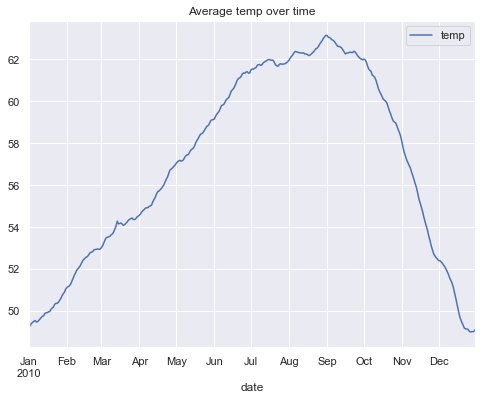

In [9]:
df.resample('D').mean().plot(title='Average temp over time')

### 2.  Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:title={'center':'Min temp over time'}, xlabel='date'>

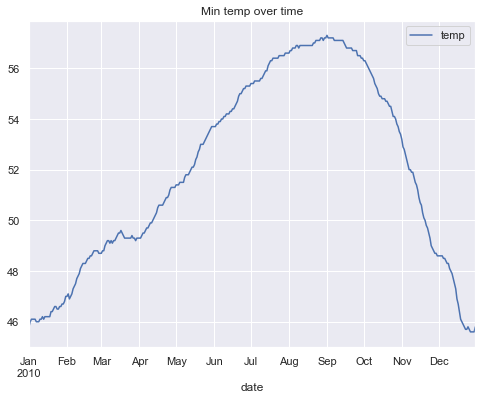

In [10]:
df.resample('D').min().plot(title='Min temp over time')

### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Max temp over time'}, xlabel='date'>

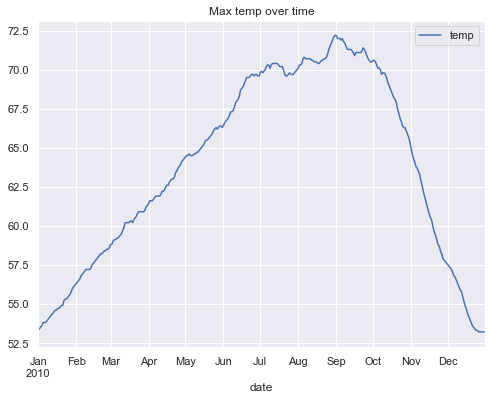

In [11]:
df.resample('D').max().plot(title='Max temp over time')

In [12]:
df.resample('D').mean().resample('M').mean().sort_values('temp').index[0]

Timestamp('2010-01-31 00:00:00')

In [13]:

df.resample('M').mean().sort_values('temp').index[-1]

Timestamp('2010-09-30 00:00:00')

In [14]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily['delta_temp'] = daily['max'] - daily['min']
daily.head()

,min,max,delta_temp
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [15]:

daily.resample('M').delta_temp.mean().sort_values().index[-1]

Timestamp('2010-09-30 00:00:00')

### 4. Which month is the coldest, on average?

In [16]:
df['month'] = df.index.month_name()

In [17]:
df.groupby('month').mean().nsmallest(n=1, columns='temp')

,temp
month,
January,49.98


In [18]:
# January is the coldest month on average

### 5. Which month has the highest average temperature?

In [19]:
df.groupby('month').mean().nlargest(n=1, columns='temp')

,temp
month,
September,62.49


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [20]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [21]:
daily['temp_diff'] = daily['max'] - daily['min']
daily.head()

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70


In [22]:
daily.resample('M').max().temp_diff.sort_values(ascending=False)

date
2010-08-31   15.00
2010-09-30   14.90
2010-06-30   14.80
2010-07-31   14.80
2010-10-31   14.40
2010-05-31   13.10
2010-04-30   13.00
2010-03-31   12.00
2010-11-30   11.80
2010-02-28    9.90
2010-01-31    9.30
2010-12-31    8.90
Name: temp_diff, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

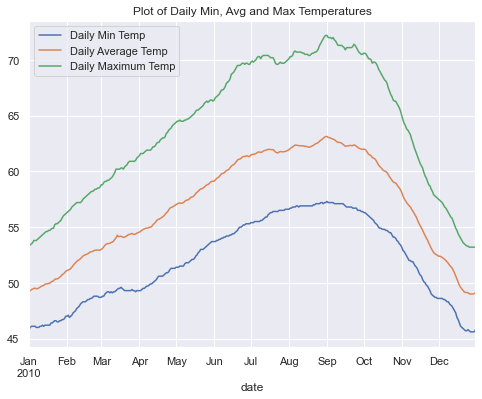

In [23]:
df.resample('D').min().temp.plot(label="Daily Min Temp")
df.resample('D').mean().temp.plot(label="Daily Average Temp")
df.resample('D').max().temp.plot(label="Daily Maximum Temp")
plt.title('Plot of Daily Min, Avg and Max Temperatures')
plt.legend()
plt.show()

## Use the dataset to answer the following questions:

## Seattle Weather

In [24]:
seattle_df = data.seattle_weather()
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [25]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


### - Which year and month combination has the highest amount of precipitation?

In [26]:
# Set date to index
seattle_df = seattle_df.set_index('date').sort_index()

In [27]:
seattle_df.resample('M').sum().nlargest(n=1, columns='precipitation')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


### - Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

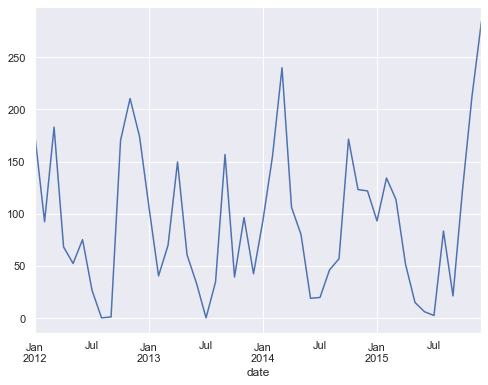

In [28]:
seattle_df.resample('M').sum().precipitation.plot()

### - Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

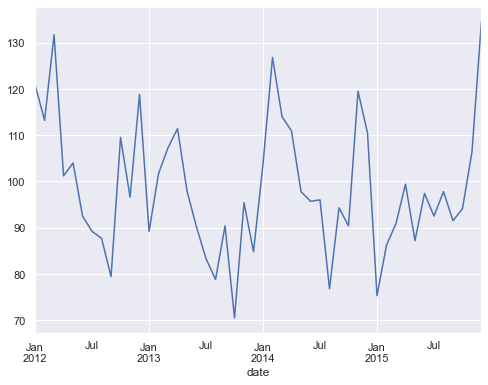

In [29]:
# Monthly
seattle_df.resample('M').sum().wind.plot()

### - Which year-month combination is the windiest?

In [30]:
seattle_df.resample('M').sum().nlargest(n=1, columns='wind')

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.50,259.80,118.60,134.60


### - What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [31]:
seattle_df['has_sun'] = seattle_df['weather'] == 'sun'

In [32]:
seattle_df.resample('A').sum().nlargest(n=1, columns='has_sun')

,precipitation,temp_max,temp_min,wind,has_sun
date,,,,,
2014-12-31,1232.80,6203.50,3161.80,1236.50,211


### - In which month does it rain the most? 

In [33]:
# Create a 'month' column to break out the month
seattle_df['month'] = seattle_df.index.month_name()

# let's look at it
seattle_df.groupby('month').mean().nlargest(n=1, columns='precipitation')


,precipitation,temp_max,temp_min,wind,has_sun
month,,,,,
November,5.35,11.02,4.70,3.48,0.35


### - Which month has the most number of days with a non-zero amount of precipitation?

In [34]:
# lets reword that, which month has the most days with rain
seattle_df['has_rain'] = seattle_df['precipitation'] > 0
seattle_df.groupby('month').mean().nlargest(n=1, columns='has_rain')

,precipitation,temp_max,temp_min,wind,has_sun,has_rain
month,,,,,,
December,5.02,8.19,3.32,3.62,0.32,0.65


## Flights

In [35]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [36]:
df = df.set_index('date').sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### - Convert any negative delays to 0. 

In [37]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [38]:
# use the function
df.delay = df.delay.apply(delay_to_zero)

In [39]:
df.delay = np.where(df.delay < 0, 0, df.delay)

### - Which hour of the day has the highest average delay?

In [40]:
df['hour'] = df.index.hour

In [41]:
df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

### - Does the day of the week make a difference in the delay amount?

In [42]:
df['week_day'] = df.index.day_name()

In [43]:
df.groupby('week_day').delay.mean().sort_values(ascending=False)

week_day
Friday      17.76
Thursday    12.82
Wednesday   11.03
Sunday      10.41
Tuesday      9.41
Saturday     8.43
Monday       7.17
Name: delay, dtype: float64

### - Does the month make a difference in the delay amount?
- Yes, February has a mean of 12.31 which is greater than all other months

In [44]:
df['month'] = df.index.month_name()
df.groupby('month').delay.mean()

month
February   12.31
January    11.30
March       9.88
Name: delay, dtype: float64

## Bonus

In [45]:
from vega_datasets import data
df = data.iowa_electricity()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB
